## Diamonds dataset Preprocessing

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the csv file
data = pd.read_csv("diamonds_new.csv")

In [3]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [4]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [5]:
# identify datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [7]:
data[['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [8]:
data.shape

(53940, 9)

In [9]:
#summary statistics
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [10]:
# identify indexes where x,y,z values are zero
zero_index = data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index

In [11]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [12]:
# drop the rows with 0's
data1 = data.drop(zero_index)

In [13]:
data1.shape

(53932, 9)

In [14]:
#identify outliers in y,z since their max values are very high

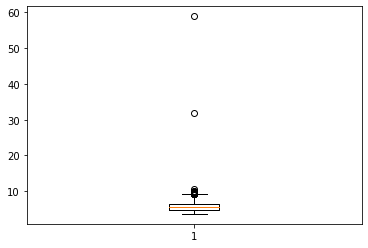

In [15]:
plt.boxplot(data1['y'])
plt.show()

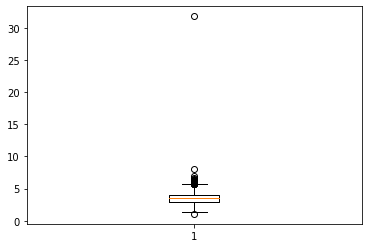

In [16]:
plt.boxplot(data1['z'])
plt.show()

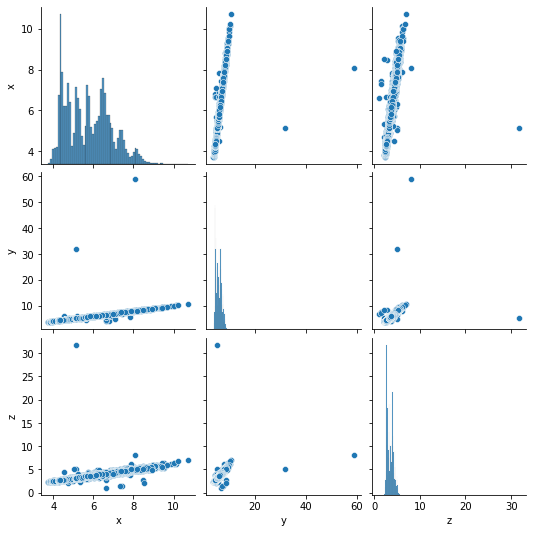

In [17]:
# use pairplot to identify outliers in x,y and z columns

sns.pairplot(data1[['x','y','z']])
plt.show()

There are few outliers in x,y and z columns.

In [18]:
# identify the index of outliers above in y and z 
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [19]:
data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [20]:
#drop the outliers 
data2 = data1.drop([24067, 49189,48410])

In [21]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


### Handling missing values

In [22]:
#check for any missing values
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

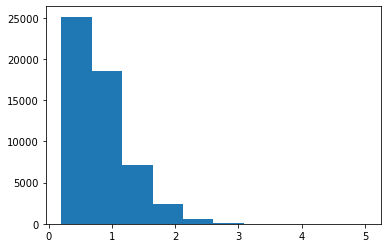

In [23]:
# check the distribution for carat and table

plt.hist(data2['carat'])
plt.show()

The distribution is skewed to the right so we can use median to replace missing values.

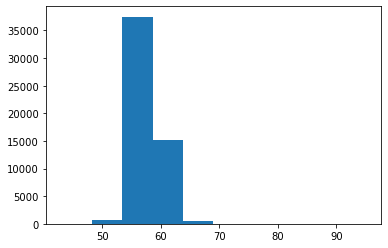

In [24]:
plt.hist(data2['table'])
plt.show()

The distribution is normal, so we can use mean to replace missing values.

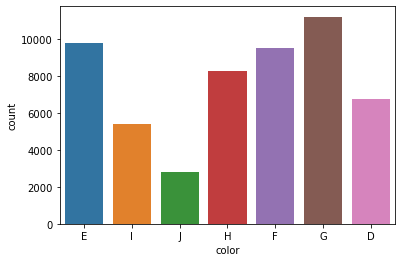

In [25]:
# check distribution of categorical variable color

sns.countplot(x =data2['color'])
plt.show()

In [26]:
data2['color'].value_counts()

G    11234
E     9795
F     9539
H     8301
D     6774
I     5422
J     2808
Name: color, dtype: int64

Since the data is not highly skewed, we can use mode to replace the missing values in color column.

In [27]:
# use Simpleimputer to handle missing values
from sklearn.impute import SimpleImputer

In [28]:
# impute carat column
impute = SimpleImputer(missing_values=np.nan , strategy="median")
data2['carat'] = impute.fit_transform(data2['carat'].values.reshape(-1,1))

In [29]:
data2.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [30]:
# impute table column
impute = SimpleImputer(missing_values=np.nan , strategy="mean")
data2['table'] = impute.fit_transform(data2['table'].values.reshape(-1,1))

In [31]:
data2.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [32]:
# impute color column
impute = SimpleImputer(missing_values=np.nan , strategy="most_frequent")
data2['color'] = impute.fit_transform(data2['color'].values.reshape(-1,1))

In [33]:
data2.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [34]:
data2.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

### Encoding

In [35]:
#check number of unique values in object dtype columns
data2['cut'].nunique()

5

In [36]:
data2['color'].nunique()

7

In [37]:
data2['clarity'].nunique()

8

In [38]:
# perform One hot encoding on color column since there is no order to it

data2 =pd.get_dummies(data2, columns=['color'])

In [39]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,Premium,SI1,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,Good,VS1,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,Premium,VS2,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,Good,SI2,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1


In [40]:
# Label encode cut and clarity
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
data2['cut'] = le.fit_transform(data2['cut'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [41]:
print(le_name_mapping)

{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}


In [42]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,SI2,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,SI1,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,VS1,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,VS2,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,SI2,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1


In [43]:

le  = LabelEncoder()
data2['clarity'] = le.fit_transform(data2['clarity'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [44]:
print(le_name_mapping)

{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [45]:
data2.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1


In [46]:
#evaluate model after test-train split

X = data2.drop('price_new', axis=1)
y = data2['price_new']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error is:",mean_squared_error(y_test,predictions))
print("R squared value is : ", r2_score(y_test, predictions))

Mean squared error is: 431900.4311924384
R squared value is :  0.8904530929785359


In [50]:
data2

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,2,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,1,2,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,4,2,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,3,3,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


### Scaling

In [51]:
data2.describe()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,3.835135,57.457669,5.731986,5.733796,3.539523,1966.026702,0.125610,0.181628,0.176881,0.209349,0.153925,0.100540,0.052068
std,0.473967,1.027659,1.724708,2.234014,1.119649,1.111501,0.691693,1994.334768,0.331412,0.385541,0.381571,0.406848,0.360880,0.300721,0.222167
min,0.200000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,56.000000,4.710000,4.720000,2.910000,474.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,2.000000,4.000000,57.000000,5.700000,5.710000,3.530000,1200.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,3.000000,5.000000,59.000000,6.540000,6.540000,4.040000,2662.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,4.000000,7.000000,95.000000,10.740000,10.540000,6.980000,9411.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
target = data2[['price_new']]

In [53]:
data2.columns

Index(['carat', 'cut', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'],
      dtype='object')

In [54]:
data2.dtypes

carat        float64
cut            int32
clarity        int32
table        float64
x            float64
y            float64
z            float64
price_new    float64
color_D        uint8
color_E        uint8
color_F        uint8
color_G        uint8
color_H        uint8
color_I        uint8
color_J        uint8
dtype: object

In [55]:
# drop label encoded columns cut,clarity before scaling

data3 = data2.drop(['price_new','cut','clarity'], axis=1)


In [56]:
# Use Min max scaler

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(feature_range=(0,1))

data3 = min_max.fit_transform(data3)

In [57]:
data3 = pd.DataFrame(data3, columns=['carat','table', 'x', 'y', 'z',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'], index =data2.index)

In [58]:
data3.describe()

,carat,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.124297,0.278032,0.285590,0.299387,0.417855,0.125610,0.181628,0.176881,0.209349,0.153925,0.100540,0.052068
std,0.098538,0.042962,0.159722,0.162026,0.117038,0.331412,0.385541,0.381571,0.406848,0.360880,0.300721,0.222167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.250000,0.139800,0.151603,0.311337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103950,0.269231,0.281027,0.295918,0.416244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174636,0.307692,0.400856,0.416910,0.502538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
data3

,carat,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.006237,0.230769,0.031384,0.043732,0.230118,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002079,0.346154,0.022825,0.023324,0.209814,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.423077,0.045649,0.056851,0.209814,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.018711,0.288462,0.067047,0.080175,0.263959,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022869,0.288462,0.087019,0.097668,0.284264,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.269231,0.288160,0.303207,0.411168,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53936,0.108108,0.230769,0.279601,0.301749,0.429780,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53937,0.103950,0.326923,0.275321,0.291545,0.421320,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53938,0.137214,0.288462,0.345221,0.355685,0.451777,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
cat_var = data2[['cut', 'clarity']]

In [61]:
data3 = pd.concat([data3 ,cat_var], axis=1)

In [62]:
#evaluate model after test-train split

X = data3
y = target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [64]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [65]:
print("Mean squared error is:",mean_squared_error(y_test,predictions))
print("R squared value is : ", r2_score(y_test, predictions))

Mean squared error is: 431900.43119243847
R squared value is :  0.8904530929785359


In [66]:
data2.describe()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,3.835135,57.457669,5.731986,5.733796,3.539523,1966.026702,0.125610,0.181628,0.176881,0.209349,0.153925,0.100540,0.052068
std,0.473967,1.027659,1.724708,2.234014,1.119649,1.111501,0.691693,1994.334768,0.331412,0.385541,0.381571,0.406848,0.360880,0.300721,0.222167
min,0.200000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,56.000000,4.710000,4.720000,2.910000,474.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,2.000000,4.000000,57.000000,5.700000,5.710000,3.530000,1200.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,3.000000,5.000000,59.000000,6.540000,6.540000,4.040000,2662.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,4.000000,7.000000,95.000000,10.740000,10.540000,6.980000,9411.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
data3 = data2.drop(['price_new','cut','clarity','color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'], axis=1)

In [68]:
# Use standard scaler

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_df = std_scale.fit_transform(data3)

In [69]:
std_df = pd.DataFrame(std_df, columns=['carat','table', 'x', 'y', 'z'],index =data2.index)

In [70]:
std_df.describe()

,carat,table,x,y,z
count,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04
mean,-2.430631e-14,1.355877e-15,3.558237e-15,-1.956455e-15,-7.803408e-14
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261423e+00,-6.471670e+00,-1.788064e+00,-1.847784e+00,-3.570290e+00
25%,-8.394488e-01,-6.524948e-01,-9.127817e-01,-9.121040e-01,-9.101268e-01
50%,-2.064881e-01,-2.048659e-01,-2.856793e-02,-2.140867e-02,-1.376737e-02
75%,5.108673e-01,6.903919e-01,7.216741e-01,7.253359e-01,7.235605e-01
max,8.887047e+00,1.680503e+01,4.472884e+00,4.324105e+00,4.974039e+00


In [71]:
std_df

,carat,table,x,y,z
0,-1.198127,-1.100124,-1.591572,-1.577876,-1.604082
1,-1.240324,1.585650,-1.645161,-1.703833,-1.777571
2,-1.198127,3.376165,-1.502258,-1.496904,-1.777571
3,-1.071534,0.242763,-1.368286,-1.352953,-1.314934
4,-1.029337,0.242763,-1.243245,-1.244990,-1.141445
...,...,...,...,...,...
53935,-0.164291,-0.204866,0.016089,0.023576,-0.057140
53936,-0.164291,-1.100124,-0.037499,0.014579,0.101892
53937,-0.206488,1.138021,-0.064294,-0.048399,0.029605
53938,0.131091,0.242763,0.373347,0.347465,0.289838


In [72]:
cat_var1 = data2[['cut', 'clarity','color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J']]

In [73]:
std_df = pd.concat([std_df ,cat_var1], axis=1)

In [74]:
#evaluate model after test-train split

X = std_df
y = target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [76]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [77]:
print("Mean squared error is:",mean_squared_error(y_test,predictions))
print("R squared value is : ", r2_score(y_test, predictions))

Mean squared error is: 431900.43119243847
R squared value is :  0.8904530929785359


The mean squared error remains same for both Min-max scaling and Standard scaling.

### Normalize the data

In [86]:
# drop target variable and label encoded variables before normalizing

X = data2.drop(['price_new','cut','clarity','color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'], axis=1)

In [87]:
import sklearn.preprocessing

norm_df = sklearn.preprocessing.normalize(X)

In [89]:
norm_df = pd.DataFrame(norm_df,columns=['carat', 'table', 'x', 'y', 'z'],index =data2.index)

In [90]:
norm_df.describe()

,carat,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.013643,0.987843,0.098459,0.098496,0.060816
std,0.007951,0.004671,0.018363,0.018250,0.011445
min,0.003211,0.959475,0.058395,0.058999,0.018516
25%,0.006851,0.984728,0.081831,0.081979,0.050527
50%,0.012097,0.988596,0.097209,0.097303,0.060019
75%,0.018061,0.991956,0.112200,0.112133,0.069386
max,0.081474,0.995890,0.174657,0.172524,0.115817


In [91]:
norm_df

,carat,table,x,y,z
0,0.004156,0.993875,0.071378,0.071920,0.043911
1,0.003426,0.995296,0.063470,0.062655,0.037691
2,0.003523,0.995491,0.062027,0.062333,0.035378
3,0.004969,0.993737,0.071960,0.072474,0.045061
4,0.005309,0.993317,0.074328,0.074499,0.047097
...,...,...,...,...,...
53935,0.012481,0.988058,0.099673,0.099846,0.060670
53936,0.012923,0.987194,0.102130,0.103207,0.064796
53937,0.011543,0.989412,0.093335,0.093664,0.058705
53938,0.014633,0.986885,0.104644,0.104133,0.063637


In [92]:
cat_var1 = data2[['cut', 'clarity','color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J']]

In [93]:
norm_df = pd.concat([norm_df ,cat_var1], axis=1)

In [94]:
norm_df

,carat,table,x,y,z,cut,clarity,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.004156,0.993875,0.071378,0.071920,0.043911,2,3,0,1,0,0,0,0,0
1,0.003426,0.995296,0.063470,0.062655,0.037691,3,2,0,1,0,0,0,0,0
2,0.003523,0.995491,0.062027,0.062333,0.035378,1,4,0,1,0,0,0,0,0
3,0.004969,0.993737,0.071960,0.072474,0.045061,3,5,0,0,0,0,0,1,0
4,0.005309,0.993317,0.074328,0.074499,0.047097,1,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.012481,0.988058,0.099673,0.099846,0.060670,2,2,1,0,0,0,0,0,0
53936,0.012923,0.987194,0.102130,0.103207,0.064796,1,2,1,0,0,0,0,0,0
53937,0.011543,0.989412,0.093335,0.093664,0.058705,4,2,1,0,0,0,0,0,0
53938,0.014633,0.986885,0.104644,0.104133,0.063637,3,3,0,0,0,0,1,0,0


In [95]:
X = norm_df
y = target


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [97]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [98]:
print("Mean squared error is:",mean_squared_error(y_test,predictions))
print("R squared value is : ", r2_score(y_test, predictions))

Mean squared error is: 427431.0066894087
R squared value is :  0.8915867145151505


After Normalization, mean-squared error has decreased.

### Correlation

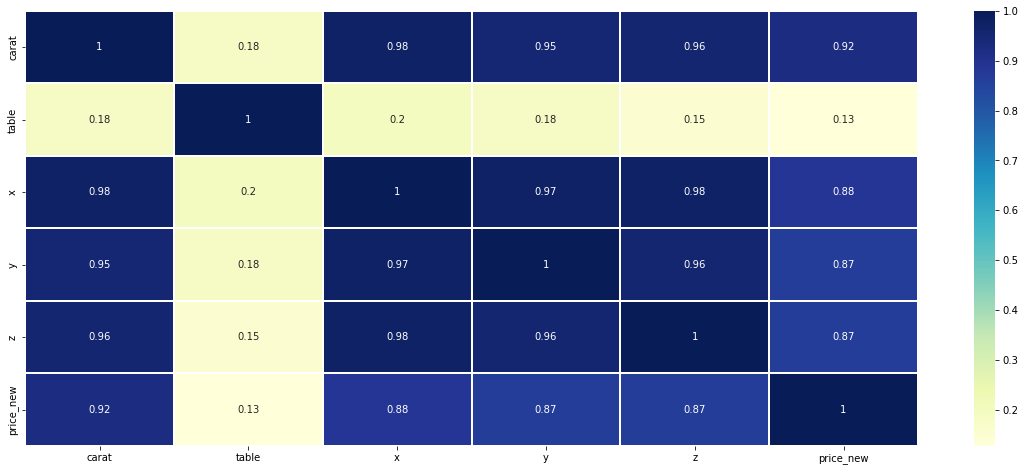

In [99]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,linewidths=0.2,cmap ='YlGnBu',annot=True)
plt.show()

x vs carat , x vs y , x vs z have high correlation.
